In [176]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [164]:
df = pd.read_csv("datasets\insurance.csv")
# cols =['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
# df = df[cols]

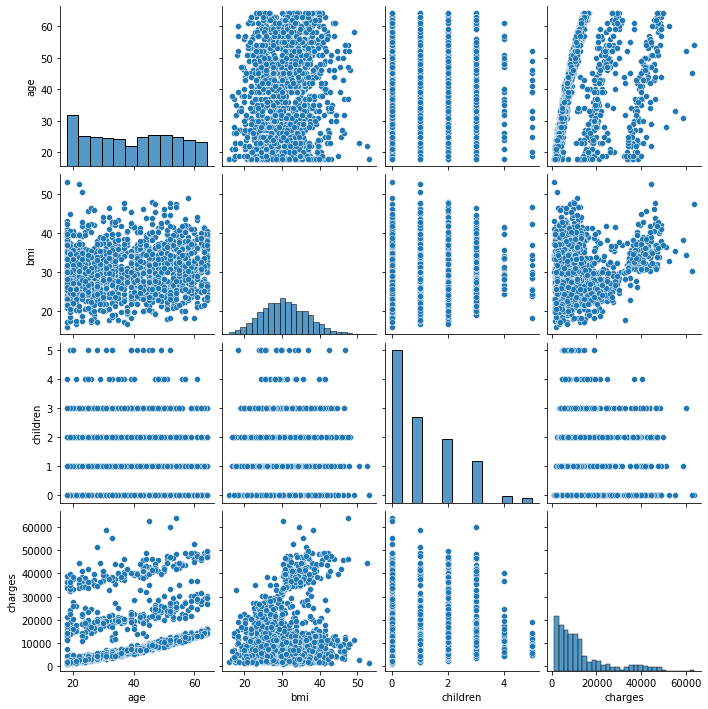

In [165]:
sns.pairplot(df)

<AxesSubplot:xlabel='charges', ylabel='Count'>

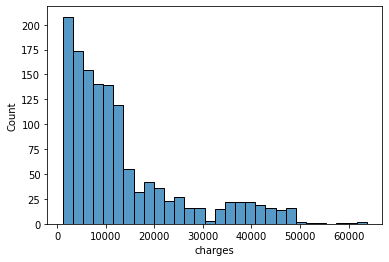

In [166]:
sns.histplot(df['charges'])

<AxesSubplot:>

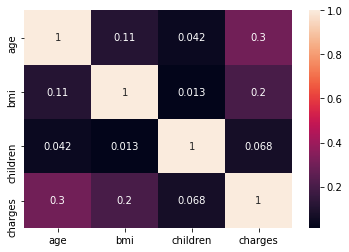

In [167]:
sns.heatmap(df.corr(), annot=True)

In [168]:
sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])

df = pd.concat([df, sex_dummy, smoker_dummy, region_dummy], axis=1)
df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)
print(df)

      age     sex     bmi  children smoker     region      charges  female  \
0      19  female  27.900         0    yes  southwest  16884.92400       1   
1      18    male  33.770         1     no  southeast   1725.55230       0   
2      28    male  33.000         3     no  southeast   4449.46200       0   
3      33    male  22.705         0     no  northwest  21984.47061       0   
4      32    male  28.880         0     no  northwest   3866.85520       0   
...   ...     ...     ...       ...    ...        ...          ...     ...   
1333   50    male  30.970         3     no  northwest  10600.54830       0   
1334   18  female  31.920         0     no  northeast   2205.98080       1   
1335   18  female  36.850         0     no  southeast   1629.83350       1   
1336   21  female  25.800         0     no  southwest   2007.94500       1   
1337   61  female  29.070         0    yes  northwest  29141.36030       1   

      male  non-smoker  nicotian  northeast  northwest  southea

In [169]:
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [170]:
print(df.head)

<bound method NDFrame.head of       age     bmi  children      charges  female  male  non-smoker  nicotian  \
0      19  27.900         0  16884.92400       1     0           0         1   
1      18  33.770         1   1725.55230       0     1           1         0   
2      28  33.000         3   4449.46200       0     1           1         0   
3      33  22.705         0  21984.47061       0     1           1         0   
4      32  28.880         0   3866.85520       0     1           1         0   
...   ...     ...       ...          ...     ...   ...         ...       ...   
1333   50  30.970         3  10600.54830       0     1           1         0   
1334   18  31.920         0   2205.98080       1     0           1         0   
1335   18  36.850         0   1629.83350       1     0           1         0   
1336   21  25.800         0   2007.94500       1     0           1         0   
1337   61  29.070         0  29141.36030       1     0           0         1   

      nor

In [171]:
# X = df[['age', 'bmi', 'children', 'female','male','non-smoker', 'nicotian','northeast','northwest', 'southeast','southwest',]]
X = df[['age', 'bmi', 'non-smoker']]
# X = preprocessing.scale(X)
y = np.array(df['charges'])

<AxesSubplot:>

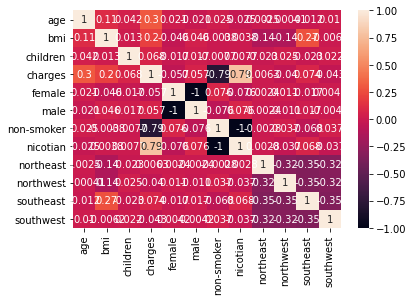

In [172]:
sns.heatmap(df.corr(),annot=True)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [174]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7189876658055302


In [177]:
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)